In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import Quandl
%pylab inline
sb.set_context("talk")

Populating the interactive namespace from numpy and matplotlib


In [7]:
data = Quandl.get(["BCB/433", "BCB/7845"], trim_start="1994-12-01")

In [8]:
data.columns = ["IPCA", "IBOVESPA"]

In [9]:
data.head()

,IPCA,IBOVESPA
Date,,
1994-12-31,1.71,43539
1995-01-31,1.70,38850
1995-02-28,1.02,32708
1995-03-31,1.55,29789
1995-04-30,2.43,38137


In [10]:
data["IBOVESPA"].diff().shift(-1).head()

Date
1994-12-31   -4689
1995-01-31   -6142
1995-02-28   -2919
1995-03-31    8348
1995-04-30    -932
Name: IBOVESPA, dtype: float64

In [11]:
data["IBOVESPA"].head()

Date
1994-12-31    43539
1995-01-31    38850
1995-02-28    32708
1995-03-31    29789
1995-04-30    38137
Name: IBOVESPA, dtype: float64

In [12]:
data["IBOVESPA_D"] = (data["IBOVESPA"].diff().shift(-1)/data["IBOVESPA"]).shift()

In [13]:
data.head()

,IPCA,IBOVESPA,IBOVESPA_D
Date,,,
1994-12-31,1.71,43539,NaN
1995-01-31,1.70,38850,-0.107697
1995-02-28,1.02,32708,-0.158095
1995-03-31,1.55,29789,-0.089244
1995-04-30,2.43,38137,0.280238


In [14]:
# (data["IBOVESPA"][0]*(1 + data["IBOVESPA_D"]).shift(-1)).shift().head()
data["IBOVESPA"][0]*(np.cumprod((1 + data["IBOVESPA_D"]).shift(-1)).shift()).head()

Date
1994-12-31      NaN
1995-01-31    38850
1995-02-28    32708
1995-03-31    29789
1995-04-30    38137
Name: IBOVESPA_D, dtype: float64

In [15]:
data["IBOVESPA_D_DEFL"] = (1 + data["IBOVESPA_D"])/(1 + data["IPCA"]/100) - 1
data.tail()

,IPCA,IBOVESPA,IBOVESPA_D,IBOVESPA_D_DEFL
Date,,,,
2015-05-31,0.74,52760,-0.061694,-0.068587
2015-06-30,0.79,53080,0.006065,-0.001820
2015-07-31,0.62,50864,-0.041748,-0.047653
2015-08-31,0.22,46625,-0.083340,-0.085352
2015-09-30,0.54,NaN,NaN,NaN


In [16]:
data.head()

,IPCA,IBOVESPA,IBOVESPA_D,IBOVESPA_D_DEFL
Date,,,,
1994-12-31,1.71,43539,NaN,NaN
1995-01-31,1.70,38850,-0.107697,-0.122612
1995-02-28,1.02,32708,-0.158095,-0.166596
1995-03-31,1.55,29789,-0.089244,-0.103145
1995-04-30,2.43,38137,0.280238,0.249866


In [17]:
data["IBOVESPA_DEFL"] = data["IBOVESPA"][0]*(np.cumprod((1 + data["IBOVESPA_D_DEFL"]).shift(-1)).shift())

In [18]:
data["IBOVESPA_DEFL"][0] = data["IBOVESPA"][0]

In [19]:
data.head()

,IPCA,IBOVESPA,IBOVESPA_D,IBOVESPA_D_DEFL,IBOVESPA_DEFL
Date,,,,,
1994-12-31,1.71,43539,NaN,NaN,43539.000000
1995-01-31,1.70,38850,-0.107697,-0.122612,38200.589971
1995-02-28,1.02,32708,-0.158095,-0.166596,31836.526038
1995-03-31,1.55,29789,-0.089244,-0.103145,28552.732697
1995-04-30,2.43,38137,0.280238,0.249866,35687.087793


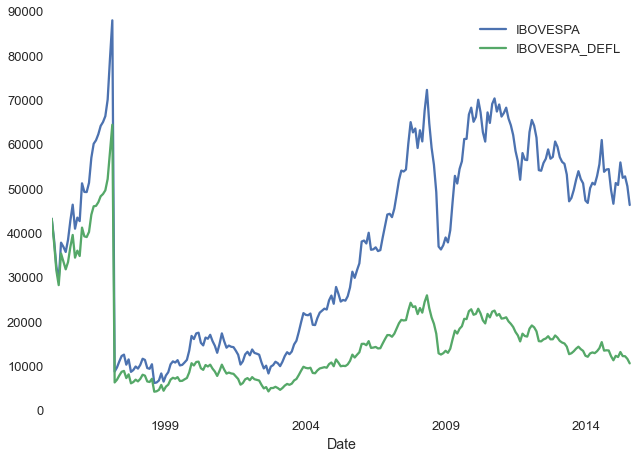

In [20]:
data[["IBOVESPA", "IBOVESPA_DEFL"]].plot();

In [24]:
data['ANO'] = data.index.year

In [25]:
data.head()

,IPCA,IBOVESPA,IBOVESPA_D,IBOVESPA_D_DEFL,IBOVESPA_DEFL,ANO
Date,,,,,,
1994-12-31,1.71,43539,NaN,NaN,43539.000000,1994
1995-01-31,1.70,38850,-0.107697,-0.122612,38200.589971,1995
1995-02-28,1.02,32708,-0.158095,-0.166596,31836.526038,1995
1995-03-31,1.55,29789,-0.089244,-0.103145,28552.732697,1995
1995-04-30,2.43,38137,0.280238,0.249866,35687.087793,1995


In [32]:
def governo(ano):
    if ano in range(1995, 1999):
        return 'FCH 1'
    elif ano in range(1999, 2003):
        return 'FHC 2'
    elif ano in range(2003, 2007):
        return 'LULA 1'
    elif ano in range(2007, 2011):
        return 'LULA 2'
    elif ano in range(2011, 2015):
        return 'DILMA 1'
    elif ano in range(2015, 2019):
        return 'DILMA 2'

data['GOVERNO'] = data['ANO'].map(governo)

In [38]:
data_gov = data.groupby('GOVERNO')
data_gov[['IBOVESPA_D', 'IBOVESPA_D_DEFL']].aggregate(lambda x: np.prod(1 + x) - 1)

,IBOVESPA_D,IBOVESPA_D_DEFL
GOVERNO,,
DILMA 1,-0.278440,-0.431994
DILMA 2,-0.067631,-0.129149
FCH 1,-0.844186,-0.891388
FHC 2,0.660967,0.187396
LULA 1,2.946841,2.078558
LULA 2,0.558339,0.275117
